### 1. Get Train \& Test Data

In [184]:
import os 
from PIL import Image, ImageOps
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt

path1 = []
path2 = []
path3 = []
path4 = []
path5 = []
path6 = []
path7 = []

# Testing just for brain_bone_window, could combine all windows
for dirname, _, filenames in os.walk('epidural/max_contrast_window'):
    for filename in filenames:
        path1.append(os.path.join(dirname, filename))
    print("Number of type 0: ", len(filenames))
        
for dirname, _, filenames in os.walk('intraparenchymal/max_contrast_window'):
    for filename in filenames:
        path2.append(os.path.join(dirname, filename))
    print("Number of type 1: ", len(filenames))
        
for dirname, _, filenames in os.walk('intraventricular/max_contrast_window'):
    for filename in filenames:
        path3.append(os.path.join(dirname, filename))
    print("Number of type 2: ", len(filenames))
        
for dirname, _, filenames in os.walk('multi/max_contrast_window'):
    for filename in filenames:
        path4.append(os.path.join(dirname, filename))  
    print("Number of type 3: ", len(filenames))

for dirname, _, filenames in os.walk('normal/max_contrast_window'):
    for filename in filenames:
        path5.append(os.path.join(dirname, filename))  
    print("Number of type 4: ", len(filenames))

for dirname, _, filenames in os.walk('subarachnoid/max_contrast_window'):
    for filename in filenames:
        path6.append(os.path.join(dirname, filename))  
    print("Number of type 5: ", len(filenames))

for dirname, _, filenames in os.walk('subdural/max_contrast_window'):
    for filename in filenames:
        path7.append(os.path.join(dirname, filename))  
    print("Number of type 6: ", len(filenames))

Number of type 0:  1694
Number of type 1:  15664
Number of type 2:  9878
Number of type 3:  32074
Number of type 4:  8599
Number of type 5:  16423
Number of type 6:  32200


In [185]:
from sklearn.preprocessing import OneHotEncoder

# One Hot Encoding
encoder = OneHotEncoder()
encoder.fit([[0],[1],[2],[3],[4],[5], [6]])

OneHotEncoder()

In [186]:
import random


data = []
result = []

for path in path1:
    img = Image.open(path)
    img = ImageOps.grayscale(img) # Removes RGB dimension from image, not sure if this is alright
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128)):
        data.append(np.array(img))
        result.append(0)
        
for path in path2:
    img = Image.open(path)
    img = ImageOps.grayscale(img)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128)):
        data.append(np.array(img))
        result.append(1) 
        
for path in path3:
    img = Image.open(path)
    img = ImageOps.grayscale(img)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128)):
        data.append(np.array(img))
        result.append(2)
        
for path in path4:
    img = Image.open(path)
    img = ImageOps.grayscale(img)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128)):
        data.append(np.array(img))
        result.append(3)

for path in path5:
    img = Image.open(path)
    img = ImageOps.grayscale(img)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128)):
        data.append(np.array(img))
        result.append(4)
        
for path in path6:
    img = Image.open(path)
    img = ImageOps.grayscale(img)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128)):
        data.append(np.array(img))
        result.append(5)

for path in path7:
    img = Image.open(path)
    img = ImageOps.grayscale(img)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128)):
        data.append(np.array(img))
        result.append(6)

length = len(data)

indices = np.arange(length)
np.random.shuffle(indices)

# Shuffle both arrays using the shuffled indices
shuffled_data = [data[i] for i in indices]
shuffled_result = [result[i] for i in indices]

train_data = shuffled_data[0:int(length*0.4)]
train_result = shuffled_result[0:int(length*0.4)]

test_data = shuffled_data[int(length*0.4):int(length*0.5)]
test_result = shuffled_result[int(length*0.4):int(length*0.5)] # FIXME: trying to reduce data so calling fit() doesn't take forever

In [187]:
test_data = np.array(test_data)
test_data.shape

test_result = np.array(test_result)
test_result.shape

(11654,)

In [188]:
train_data = np.array(train_data)
test_data.shape

train_result = np.array(train_result)
train_result.shape

(46612,)

In [189]:
# Confirm shape of data 
print("train data: ", train_data.shape)
print("test data: ", test_data.shape)
print("train data after reshape: ", train_data.reshape(-1,128*128).shape)
print("test data after reshape: ", test_data.reshape(-1,128*128).shape)

train data:  (46612, 128, 128)
test data:  (11654, 128, 128)
train data after reshape:  (46612, 16384)
test data after reshape:  (11654, 16384)


### 2. Build the Neural Network


In [190]:
X_valid, X_train = train_data[:5000] / 255., train_data[5000:] / 255.
y_valid, y_train = train_result[:5000], train_result[5000:]
X_test = test_data / 255.
y_test = test_result / 255.
print(X_train.shape, X_valid.shape, X_test.shape)
print(y_train.shape, y_valid.shape, y_test.shape)

(41612, 128, 128) (5000, 128, 128) (11654, 128, 128)
(41612,) (5000,) (11654,)


In [192]:
print(y_train.reshape(41612,-1).reshape(41612, -1).shape)

(41612, 1)


In [193]:
y_train

array([5, 1, 3, ..., 3, 3, 4])

In [194]:
class_names = ["0", "1", "2", "3", "4", "5", "6"]

In [195]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[128, 128]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[128, 128]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model.layers

In [196]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 16384)             0         
                                                                 
 dense (Dense)               (None, 300)               4915500   
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 4,946,610
Trainable params: 4,946,610
Non-trainable params: 0
_________________________________________________________________


In [197]:
weights, biases = model.layers[1].get_weights()

weights

array([[ 0.00624145, -0.00223747, -0.00557982, ..., -0.00705057,
         0.00983666, -0.01756085],
       [ 0.0012146 , -0.00791551, -0.01495419, ...,  0.00153694,
        -0.00704478, -0.01061738],
       [-0.01577629, -0.01759288,  0.01810366, ..., -0.01080306,
         0.01815253, -0.01868817],
       ...,
       [ 0.00372475,  0.01591296, -0.00610253, ...,  0.00645785,
        -0.00081756,  0.00928183],
       [ 0.00682121, -0.0023047 , -0.00090442, ...,  0.01544421,
         0.01161724,  0.00345435],
       [-0.00477747, -0.00085977,  0.00936946, ...,  0.01443502,
        -0.0025459 , -0.0019555 ]], dtype=float32)

In [198]:
weights.shape

(16384, 300)

In [199]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [200]:
biases.shape

(300,)

In [201]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

### 3. Training the Neural Network model

In [202]:
# training the model and saving metrics in history
# minibatch
history = model.fit(X_train, y_train,
          batch_size=128, epochs=30,
          verbose=1,
          validation_data=(X_valid, y_valid))

Epoch 1/30
326/326 [==============================] - 20s 39ms/step - loss: 1.7026 - accuracy: 0.3132 - val_loss: 1.9506 - val_accuracy: 0.1762
Epoch 2/30
326/326 [==============================] - 8s 24ms/step - loss: 1.6491 - accuracy: 0.3421 - val_loss: 1.9138 - val_accuracy: 0.2522
Epoch 3/30
326/326 [==============================] - 8s 23ms/step - loss: 1.6314 - accuracy: 0.3507 - val_loss: 1.7753 - val_accuracy: 0.2080
Epoch 4/30
326/326 [==============================] - 10s 30ms/step - loss: 1.6190 - accuracy: 0.3543 - val_loss: 1.6548 - val_accuracy: 0.3326
Epoch 5/30
326/326 [==============================] - 9s 29ms/step - loss: 1.6075 - accuracy: 0.3586 - val_loss: 1.7001 - val_accuracy: 0.3466
Epoch 6/30
326/326 [==============================] - 8s 24ms/step - loss: 1.5990 - accuracy: 0.3651 - val_loss: 1.6981 - val_accuracy: 0.3312
Epoch 7/30
326/326 [==============================] - 8s 23ms/step - loss: 1.5907 - accuracy: 0.3672 - val_loss: 1.8128 - val_accuracy: 0.29

In [204]:
#stochastic gradient decent
historysgd = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1301/1301 [==============================] - 25s 19ms/step - loss: 1.3510 - accuracy: 0.4756 - val_loss: 1.5714 - val_accuracy: 0.3862
Epoch 2/30
1301/1301 [==============================] - 21s 16ms/step - loss: 1.3408 - accuracy: 0.4796 - val_loss: 1.5656 - val_accuracy: 0.3870
Epoch 3/30
1301/1301 [==============================] - 19s 14ms/step - loss: 1.3294 - accuracy: 0.4869 - val_loss: 1.5894 - val_accuracy: 0.3796
Epoch 4/30
1301/1301 [==============================] - 16s 13ms/step - loss: 1.3208 - accuracy: 0.4899 - val_loss: 1.6097 - val_accuracy: 0.3950
Epoch 5/30
1301/1301 [==============================] - 16s 12ms/step - loss: 1.3096 - accuracy: 0.4944 - val_loss: 1.6273 - val_accuracy: 0.3952
Epoch 6/30
1301/1301 [==============================] - 16s 13ms/step - loss: 1.2981 - accuracy: 0.4984 - val_loss: 1.6029 - val_accuracy: 0.3968
Epoch 7/30
1301/1301 [==============================] - 16s 12ms/step - loss: 1.2861 - accuracy: 0.5037 - val_loss: 1.6032 -

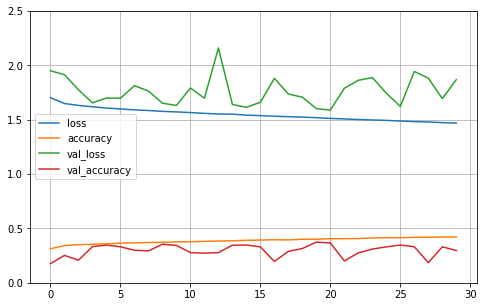

In [215]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2.5)
 
plt.show()

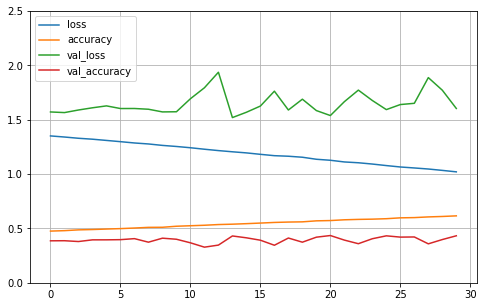

In [216]:
pd.DataFrame(historysgd.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2.5)
 
plt.show()

In [217]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.01, 0.16, 0.08, 0.19, 0.07, 0.11, 0.38, 0.  , 0.  , 0.  ],
       [0.01, 0.16, 0.09, 0.18, 0.1 , 0.12, 0.34, 0.  , 0.  , 0.  ],
       [0.01, 0.2 , 0.08, 0.16, 0.08, 0.09, 0.38, 0.  , 0.  , 0.  ]],
      dtype=float32)

In [218]:
#y_pred = model.predict_classes(X_new) # deprecated
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

array([6, 6, 6])

In [219]:
np.array(class_names)[y_pred]
y_new = y_test[:3]
y_new

array([0.02352941, 0.01960784, 0.00392157])

In [220]:
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.lr))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.lr, self.model.optimizer.lr * self.factor)

In [221]:
#clear the section
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[128, 128]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [222]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])
expon_lr = ExponentialLearningRate(factor=1.005)

In [223]:
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[expon_lr])

1301/1301 [==============================] - 29s 21ms/step - loss: 1.7827 - accuracy: 0.2918 - val_loss: 1.7847 - val_accuracy: 0.2854


Text(0, 0.5, 'Loss')

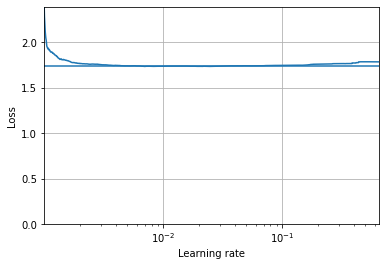

In [224]:
plt.plot(expon_lr.rates, expon_lr.losses)
plt.gca().set_xscale('log')
plt.hlines(min(expon_lr.losses), min(expon_lr.rates), max(expon_lr.rates))
plt.axis([min(expon_lr.rates), max(expon_lr.rates), 0, expon_lr.losses[0]])
plt.grid()
plt.xlabel("Learning rate")
plt.ylabel("Loss")

In [225]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[128, 128]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [226]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.SGD(lr=8e-1),
              metrics=["accuracy"])

/Users/maxleroux/opt/anaconda3/lib/python3.9/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [227]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers, callbacks

keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[128, 128]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
#The model needs to be recalled each time.

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.SGD(lr=2e-1),
              metrics=["accuracy"])

run_index = 1 # increment this at every run
run_logdir = os.path.join(os.curdir, "my_mnist_logs", "run_{:03d}".format(run_index))

early_stopping_cb = keras.callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
)
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_mnist_model.h5", save_best_only=True)
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb, tensorboard_cb])

Epoch 1/100
1301/1301 [==============================] - 28s 21ms/step - loss: 106932.6484 - accuracy: 0.2742 - val_loss: 1.7341 - val_accuracy: 0.2854
Epoch 2/100
1301/1301 [==============================] - 19s 15ms/step - loss: 1.7329 - accuracy: 0.2767 - val_loss: 1.7303 - val_accuracy: 0.2854
Epoch 3/100
1301/1301 [==============================] - 18s 14ms/step - loss: 1.7227 - accuracy: 0.2782 - val_loss: 1.7292 - val_accuracy: 0.2854
Epoch 4/100
1301/1301 [==============================] - 19s 14ms/step - loss: 1.7220 - accuracy: 0.2734 - val_loss: 1.7294 - val_accuracy: 0.2602
Epoch 5/100
1301/1301 [==============================] - 17s 13ms/step - loss: 1.7214 - accuracy: 0.2761 - val_loss: 1.7273 - val_accuracy: 0.2602
Epoch 6/100
1301/1301 [==============================] - 17s 13ms/step - loss: 1.7209 - accuracy: 0.2785 - val_loss: 1.7284 - val_accuracy: 0.2602
Epoch 7/100
1301/1301 [==============================] - 18s 14ms/step - loss: 1.7206 - accuracy: 0.2786 - val_lo

In [228]:
model = keras.models.load_model("my_mnist_model.h5") # rollback to best model
model.evaluate(X_test, y_test)
model.evaluate(X_valid, y_valid)
model.evaluate(X_train, y_train)

1301/1301 [==============================] - 13s 10ms/step - loss: 1.7195 - accuracy: 0.2792


[1.7195444107055664, 0.279174268245697]

In [229]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=tf.keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
1301/1301 [==============================] - 18s 12ms/step - loss: 4.1553 - val_loss: 3.4022
Epoch 2/20
1301/1301 [==============================] - 7s 6ms/step - loss: 3.3146 - val_loss: 3.2325
Epoch 3/20
1301/1301 [==============================] - 8s 6ms/step - loss: 3.2588 - val_loss: 3.2403
Epoch 4/20
1301/1301 [==============================] - 8s 6ms/step - loss: 3.2548 - val_loss: 3.2414
Epoch 5/20
1301/1301 [==============================] - 8s 6ms/step - loss: 3.2517 - val_loss: 3.2222
Epoch 6/20
1301/1301 [==============================] - 7s 6ms/step - loss: 3.2496 - val_loss: 3.2252
Epoch 7/20
1301/1301 [==============================] - 7s 5ms/step - loss: 3.2488 - val_loss: 3.2174
Epoch 8/20
1301/1301 [==============================] - 7s 5ms/step - loss: 3.2485 - val_loss: 3.2198
Epoch 9/20
1301/1301 [==============================] - 9s 7ms/step - loss: 3.2466 - val_loss: 3.2173
Epoch 10/20
1301/1301 [==============================] - 8s 6ms/step - loss: 3.2

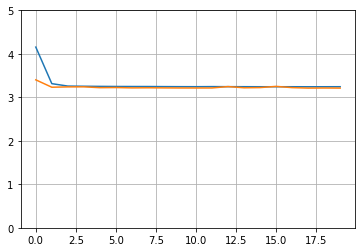

In [230]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 5)
plt.show()